In [1]:
import pandas as pd
import numpy as np
from doc_bd import Manage_db
import json
import os
import mysql.connector
from mysql.connector import errorcode
import re
import urllib3
import time
import warnings
warnings.filterwarnings('ignore')
urllib3.disable_warnings()
import matplotlib.pyplot as plt
#import sklearn

In [2]:
sql = Manage_db(database = 'lop2test', host = 'localhost', user='root', password='')

#df_class.loc[df['id_class'] == 'f2dd7bef-5b5d-4cb3-9efa-aa8652af0605']
id_class = 'e378c59f-e815-4a41-95fc-e95e4432a34c'
#pd_data = pd.DataFrame([id_class], columns = ['id_class'])
condition = "WHERE class_id = 'e378c59f-e815-4a41-95fc-e95e4432a34c'"
df_submission = sql.search(table='submission')
list_quest_subm = df_submission.drop(['ip', 'id', 'environment','hitPercentage','timeConsuming','createdAt','type','language', 'answer', 'char_change_number', 'user_id', 'lesson_id', 'class_id', 'test_id'], axis=1).drop_duplicates()
df_submission_class = sql.search(table='submission', condition=condition)
df_lop_lists = sql.search(table='listQuestions')

df_lop_tests = sql.search(table='test')

df_class = sql.search(table='class')
df_quest = sql.search(table='question')

users_class = sql.search(table='classHasUser')
tag = sql.search(table='tag')
quest_tag = sql.search(table='questionHasTag')
df_list_q = sql.search(table='listHasQuestion')

In [3]:
tag.columns.values[0] ='tag_id'
list_class = df_submission_class['listQuestions_id'].drop_duplicates().reset_index(name='id')
a = df_lop_lists.columns.tolist()
df_list_class = pd.DataFrame(columns = a)

for i in range(list_class.count().values[0]):
    for a in range(df_lop_lists.count().values[0]):
        if list_class['id'][i] == df_lop_lists['id'][a]:
            b = dict(df_lop_lists.loc[a])
            df_list_class = df_list_class.append(b, ignore_index=True)
df_list_class.columns.values[0] = 'listQuestions_id'

test_class = df_submission_class['test_id'].drop_duplicates().reset_index(name='id')
a = df_lop_tests.columns.tolist()
df_test_class = pd.DataFrame(columns = a)

for i in range(test_class.count().values[0]):
    for a in range(df_lop_tests.count().values[0]):
        if test_class['id'][i] == df_lop_tests['id'][a]:
            b = dict(df_lop_tests.loc[a])
            df_test_class = df_test_class.append(b, ignore_index=True)
df_test_class.columns.values[0] = 'test_id'

quest_class = df_submission_class['question_id'].drop_duplicates().reset_index(name='id')
a = df_quest.columns.tolist()
df_quest_class = pd.DataFrame(columns = a)

for i in range(quest_class.count().values[0]):
    for a in range(df_quest.count().values[0]):
        if quest_class['id'][i] == df_quest['id'][a]:
            b = dict(df_quest.loc[a])
            df_quest_class = df_quest_class.append(b, ignore_index=True)
df_quest_class.columns.values[0] = 'question_id'

#verificando o total de questoes cadastrados em listas da turma 
list_name = df_list_class['listQuestions_id'].tolist()
a = df_list_q.columns.tolist()
df_q_l = pd.DataFrame(columns = a)

for i in range(df_list_class.count().values[0]):
    for a in range(df_list_q.count().values[0]):
        if df_list_class['listQuestions_id'][i] == df_list_q['list_id'][a]:
            b = dict(df_list_q.loc[a])
            df_q_l = df_q_l.append(b, ignore_index=True)
df_list_class

,listQuestions_id,title,code,createdAt,updatedAt,author_id
0,e1f0e8be-54fe-4b54-8d6d-2451bedc0647,Treinamento - Expressões Aritméticas,87add2f05c,2020-03-06 16:09:41,2020-03-06 16:09:41,1a3aa181-9fc6-41e1-b61a-febd18f4eb23
1,1551e3ed-c875-4bb3-8e4e-58407df40776,Vetores - Lista de Exercícios (LOP),309289819d,2020-07-16 17:37:42,2020-07-16 17:37:42,6a36fa60-665f-4d15-a9de-0a523b93ca71
2,c6f3f5e5-0b0c-4396-92ba-d22d4125f555,Laboratório 01 - Expressões Aritméticas,d0947edaac,2020-02-28 14:49:23,2020-02-28 14:49:23,1a3aa181-9fc6-41e1-b61a-febd18f4eb23
3,cf81af12-b0b7-40c2-8536-5e7445ace7a3,(Lop) Estruturas de decisão - Operadores Lógicos,6453a7da1d,2020-04-04 01:47:59,2020-09-15 00:02:40,1a3aa181-9fc6-41e1-b61a-febd18f4eb23
4,f5bc770d-2ac7-4060-ab1c-e42b5541f7a7,Repetição contada - Lista de Exercícios (LOP),7a2e23fcb3,2020-07-07 11:59:39,2020-07-07 11:59:39,02673ba8-1fcb-4cb0-9cf3-a789cab48731
5,aca84206-87b2-4478-afa4-6193119cc06a,Repetição condicional - Lista de Exercícios (LOP),0814ea8f94,2020-06-29 12:19:48,2020-06-29 12:19:48,2985b749-e081-400c-b2cc-97ae042a777d
6,cf509a46-6a97-440e-a5c0-f7ba7537ef96,(Lop) Estruturas de decisão - problemas sobre ...,5c2cb0df7d,2020-04-08 01:15:40,2020-04-08 01:15:40,None
7,5ebe517f-50f2-4629-a22f-1dea895fce25,Aula - Funções Aritméticas,4749406f21,2020-03-04 21:55:18,2020-03-04 21:55:18,1a3aa181-9fc6-41e1-b61a-febd18f4eb23
8,813dedaa-0989-489b-9804-3850ae4b83d1,Repetição contada - Lista Prática (LOP),73a86e8081,2020-07-07 11:56:51,2020-07-07 11:56:51,02673ba8-1fcb-4cb0-9cf3-a789cab48731
9,0a2c49a2-482c-40d7-bc44-ee368f089560,Repetição condicional - Lista Prática (LOP),5dc5d4f372,2020-06-24 13:11:49,2020-06-24 13:30:28,2985b749-e081-400c-b2cc-97ae042a777d


In [4]:
#aprovados - acima da media
#submissoes da turma
df_performance = df_submission_class.groupby(['user_id', 'listQuestions_id','question_id'])['hitPercentage'].max().reset_index()
#soma das notas por lista
df_performance = df_performance.groupby(['user_id','listQuestions_id'])['hitPercentage'].sum().reset_index()
#Me traz as porcentagens maximas de acerto por questão
df_performance = df_submission_class.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].max().reset_index()
      #Soma as porcentagens de uma lista/prova unica
df_performance = df_performance.groupby(['user_id','listQuestions_id'])['hitPercentage'].sum().reset_index()
      #Renomeando para melhorar entendimento
df_performance.rename(columns={'hitPercentage':'totalHitPercentage'}, inplace = True)
#Listas cadastradas nessa turma
lists = df_submission_class['listQuestions_id'].drop_duplicates().values
#Lista de alunos
df_without_duplicates = df_submission_class.drop_duplicates(subset=['user_id'])
df_without_duplicates = df_without_duplicates[['user_id']]
df_prov = pd.DataFrame()
for lista in lists:
    df_users = df_without_duplicates.copy()
    df_users['listQuestions_id'] = lista
    df_prov = df_prov.append(df_users)
    #df_prov.loc[df_prov['user_id']=='Flávio']
df_performance = pd.merge(df_performance,df_prov, on=['user_id','listQuestions_id'], how='outer')#.fillna(0)  
#df_question_data = df_quest.groupby(['listQuestions_id','question_id'])['id_list'].count().reset_index()
      #Conta quantas questões tem por lista
df_question_data = list_quest_subm.groupby(['listQuestions_id'])['question_id'].count().reset_index(name='totalQuestionslist')
      #Merge
df_performance = df_performance.merge(df_question_data, on = 'listQuestions_id')
    #Média de acerto por lista
df_performance['medialist'] = df_performance['totalHitPercentage'] / df_performance['totalQuestionslist']
      #Convertendo para datetime
df_lop_lists['createdAt'] = pd.to_datetime(df_lop_lists['createdAt'])
      #Criando campo com a data
df_lop_lists['dateList'] = df_lop_lists['createdAt'].dt.date
      #Merge
df_performance = pd.merge(df_performance, df_list_class.drop(columns = ['createdAt']), on='listQuestions_id')
    #graph1
    #Número de alunos na turma
total_students = df_submission_class['user_id'].drop_duplicates().count()
    #Media por lista na turma
df_mean_list = (df_performance.groupby(['listQuestions_id'])['medialist'].sum() / total_students).reset_index(name='mediaListClass')
newDf = pd.merge(df_performance, df_mean_list,on=['listQuestions_id']).sort_values(by=['user_id']).drop(columns = ['mediaListClass','totalHitPercentage', 'listQuestions_id', 'totalQuestionslist']).fillna(0)
    #newDf.loc[newDf['user_id']=='Alexandre Leonardo']
newDf = newDf.groupby(['user_id'])['medialist'].sum().reset_index()
newDf['medialist'] = newDf['medialist'] / df_list_class.count().values[0]
newDf
    #newDf
    #newDf[newDf['medialist']>=50].values[0]
    #newDf['medialist'].values[0]
    #for a in range(newDf.count().values[0]):
    #    if newDf['medialist'].values[a]>=50:
    #        b=b+1
    #b
newDf['aprovado'] = 2
for a in range(newDf.count().values[0]):
    if newDf['medialist'].values[a]>=50:
        newDf['aprovado'][a]=1
    else:
        newDf['aprovado'][a]=0
newDf[newDf['aprovado']==1]

,user_id,medialist,aprovado
0,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,96.741391,1
2,04dfe2af-6f44-4490-b9b7-d3714499e707,81.512605,1
3,08a67c0a-d34f-46a9-be4a-f6940b7d278d,98.506069,1
4,0a66a6c5-3c7f-4b93-91c1-a301c18ebe1b,78.758170,1
5,0c1b8b9d-46a8-4ab9-95d3-05cb477b4534,62.091503,1
...,...,...,...
163,f66e783b-8c07-45ff-b72c-255a952e3f77,98.506069,1
164,fbab1095-0b33-4d03-9184-5d48b3ce18e6,78.684641,1
165,fcaef8a5-2a8c-4aef-b5a2-63f4b0b16d0c,61.201017,1
166,fcb7eb8e-b20c-48ab-9d62-7151c035f78d,79.411765,1


In [5]:
#max de quantidade de questões enviadas e todo o tempo utilizado por questao 
#Convertendo para datetime
df_submission_class['createdAt'] = pd.to_datetime(df_submission_class['createdAt'])

    #Criando o campo de tempo em segundos, já que vem em ms
df_submission_class['timeInSecounds'] = df_submission_class['timeConsuming'].divide(1000).astype(int)

    #Criando campo com a data
df_submission_class['dateSubmission'] = df_submission_class['createdAt'].dt.date

    #Dataframe sem duplicatas e com tempo maior que 0
df_without_duplicates = df_submission_class[df_submission_class['timeInSecounds'] > 0].drop(['environment','hitPercentage','timeConsuming','createdAt','timeInSecounds','char_change_number'], axis=1).drop_duplicates()

    #Contando em quantos dias diferentes a questão foi submetida
df_user_days = df_without_duplicates.groupby(['user_id','question_id','listQuestions_id'])['dateSubmission'].count().reset_index(name='differentDays')
      
    #Total de segundos gasto em cada questão por aluno
df_user_secounds = df_submission_class[df_submission_class['timeInSecounds'] > 0].groupby(['user_id','question_id','listQuestions_id'])['timeInSecounds'].sum().reset_index(name='totalSecounds')

    #Descobrindo o tempo que cada questão levou para ser resolvida     
df_total_questions = df_submission_class[df_submission_class['timeInSecounds'] > 0].groupby(['user_id','question_id','listQuestions_id'])['question_id'].count().reset_index(name='quantity')

    #Unindo em matrícula, questão e lista
df_user_secounds_days = pd.merge(df_user_secounds, df_total_questions, on=['user_id','question_id','listQuestions_id'], how='outer')
    
    #Adicionando o campo nome
df_user_secounds_days = pd.merge(df_user_secounds_days, df_submission_class[['user_id']].drop_duplicates(), on='user_id', how='outer')
    
    #Retornando json
df_user_secounds_days

#observar a media de tempo por cada questao/lista

,user_id,question_id,listQuestions_id,totalSecounds,quantity
0,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,00851986-86da-4706-867c-fb0239022fcc,cf509a46-6a97-440e-a5c0-f7ba7537ef96,590.0,12.0
1,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,04e566df-8256-4c86-af22-459ab5ed6d23,93cd33c4-109a-401e-87e9-e26ff5929d37,7.0,1.0
2,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,07390e96-c92b-4134-9ec4-e140c64d20d5,cf81af12-b0b7-40c2-8536-5e7445ace7a3,88.0,1.0
3,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,0824cb6b-cf12-4789-9548-4a1f5f0d8699,93cd33c4-109a-401e-87e9-e26ff5929d37,1.0,1.0
4,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,09bee0dc-badf-469c-8838-04cc96f67c92,1551e3ed-c875-4bb3-8e4e-58407df40776,8321.0,45.0
...,...,...,...,...,...
15533,fea46941-644f-4038-811a-608fc3bea081,eb962e97-1922-49d9-be27-932e4218a7b7,e1f0e8be-54fe-4b54-8d6d-2451bedc0647,4338.0,16.0
15534,fea46941-644f-4038-811a-608fc3bea081,ebf2dd8e-dafb-4507-b64f-597f1ee506a0,5ebe517f-50f2-4629-a22f-1dea895fce25,967.0,17.0
15535,fea46941-644f-4038-811a-608fc3bea081,f170042f-e239-4edd-aaf4-fe8d7287ba04,c6f3f5e5-0b0c-4396-92ba-d22d4125f555,109.0,2.0
15536,fea46941-644f-4038-811a-608fc3bea081,f72f19f6-690a-425b-a5e3-fbac310a47fc,cf81af12-b0b7-40c2-8536-5e7445ace7a3,696.0,13.0


In [6]:
#obs
#contando o erro por questao acima do tempo zero para prevenir duplo clicke. geralmente, se há cola ou algum problema relacionado, acaba nao sendo um erro na questao
#buscando erros por questao, por aluno
df_submission_class['timeInSecounds'] = df_submission_class['timeConsuming'].divide(1000).astype(int)
df_without_duplicates = df_submission_class[df_submission_class["timeInSecounds"] > 0].drop(['environment','timeConsuming','createdAt','timeInSecounds','char_change_number'], axis=1)
df_performance = df_without_duplicates[df_without_duplicates["hitPercentage"] == 0]
df_performance = df_performance.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalError')
df_performance

,user_id,listQuestions_id,question_id,totalError
0,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,0a2c49a2-482c-40d7-bc44-ee368f089560,93bb5054-3e03-474e-b6ce-91e1a312e2b6,10
1,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,0a2c49a2-482c-40d7-bc44-ee368f089560,b75f0fbf-ec15-4456-8c81-a91a9ba37570,6
2,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,0a2c49a2-482c-40d7-bc44-ee368f089560,d393dfae-39e8-46c6-8ca4-3c70d1e95c35,1
3,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,102050fa-c902-4258-a988-01dad84ff63f,2ebe9899-2135-498f-b456-98c51902b66a,1
4,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,102050fa-c902-4258-a988-01dad84ff63f,7d0c47d7-c789-422d-95cd-d4257ef8d292,4
...,...,...,...,...
8795,fea46941-644f-4038-811a-608fc3bea081,e1f0e8be-54fe-4b54-8d6d-2451bedc0647,7337a753-839c-431b-9666-d6183e3d83a5,31
8796,fea46941-644f-4038-811a-608fc3bea081,e1f0e8be-54fe-4b54-8d6d-2451bedc0647,9ac6c40b-a95f-4c58-885a-2059d77c412e,6
8797,fea46941-644f-4038-811a-608fc3bea081,e1f0e8be-54fe-4b54-8d6d-2451bedc0647,aabab361-4431-447e-91c1-4467b930773b,1
8798,fea46941-644f-4038-811a-608fc3bea081,e1f0e8be-54fe-4b54-8d6d-2451bedc0647,bf513a97-4c06-4d91-b6e0-338dcfb75875,6


In [7]:
#obs
#por aluno, buscando erro por assunto
df_submission_class['timeInSecounds'] = df_submission_class['timeConsuming'].divide(1000).astype(int)
df_without_duplicates = df_submission_class[df_submission_class["timeInSecounds"] > 0].drop(['environment','timeConsuming','createdAt','timeInSecounds','char_change_number'], axis=1).drop_duplicates()
df_performance = df_without_duplicates[df_without_duplicates["hitPercentage"] == 0]

#df_performance = pd.merge(df_performance, df_quest_class[['list', 'question_id', 'tag1', 'tag2']].drop_duplicates(), on=['question','list'], how='outer')

#qTag = pd.merge(tag, quest_tag, on='tag_id', how=
#qTag

#df_performance['tag1'] = df_performance['tag1'].fillna('Assunto em Branco')
#df_performance['tag2'] = df_performance['tag2'].fillna('Assunto em Branco')
#df_performance = df_performance.drop(columns = ['question', 'list'])
#df_performance1 = df_performance[df_performance["hitPercentage"] == 0].groupby(['user','registration', 'tag1'])['hitPercentage'].count().reset_index(name='totalErrorTag1')
#df_performance2 = df_performance[df_performance["hitPercentage"] == 0].groupby(['user','registration', 'tag2'])['hitPercentage'].count().reset_index(name='totalErrorTag2')
#df_performance = pd.merge(df_performance1, df_performance2, on=['user', 'registration'], how='outer')
#df_performance
#quando houverem assuntos com nomes diferentes, o ideal é buscá-los por tag1 e tag2, juntar ambas tags numa só e verificar os assuntos iguais para haver os erros em conjunto
#problema no que foi falado anteriormente -> será contabilizado o mesmo erro 2x, mas 1x para cada assunto de uma mesma questão com mais de um assunto
#a forma que este dataframe atual está exposto, mostra a quantidade de erros total

In [8]:
#df_class[df_class['id_class']=='e378c59f-e815-4a41-95fc-e95e4432a34c']
#175 alunos
#4 profs
#df_submission['registration'].drop_duplicates()
#156 registros
#df_submission['user'].drop_duplicates()
#153

a = users_class[users_class['class_id']=='e378c59f-e815-4a41-95fc-e95e4432a34c']
a = a['user_id'].count()
a = a - df_submission_class['user_id'].drop_duplicates().count()

#não tem como descobrir o nome dos alunos que nunca submeteram algo
a

10

In [9]:
#buscando quantidade de alunos que não fizerem a questão
a = df_submission_class['question_id'].drop_duplicates().reset_index()
a = a.drop(['index'], axis=1)
f = users_class[users_class['class_id']=='e378c59f-e815-4a41-95fc-e95e4432a34c']
qtd_estudantes = f['user_id'].count()
df_without_duplicates = df_submission_class.drop(['id','environment','timeConsuming','createdAt','timeInSecounds','char_change_number', 'user_id', 'test_id', 'dateSubmission', 'language', 'hitPercentage', 'ip', 'type', 'answer', 'lesson_id'], axis=1).drop_duplicates().reset_index()
df_without_duplicates = df_without_duplicates.drop(['index'], axis=1)
df_without_duplicates['qtd_faltosos'] = 0
d= []
for i in range(len(a)):
    b = df_submission_class[df_submission_class['question_id']==a['question_id'][i]]
    #b = df_submission[df_submission['question']==a[0]]
    c = b['user_id'].drop_duplicates().count()
    c = qtd_estudantes - c
    df_without_duplicates['qtd_faltosos'][i] = c
df_without_duplicates

,question_id,listQuestions_id,class_id,qtd_faltosos
0,7337a753-839c-431b-9666-d6183e3d83a5,e1f0e8be-54fe-4b54-8d6d-2451bedc0647,e378c59f-e815-4a41-95fc-e95e4432a34c,38
1,2a0dd2cb-61c5-4d7b-9f3a-804b958d3b42,1551e3ed-c875-4bb3-8e4e-58407df40776,e378c59f-e815-4a41-95fc-e95e4432a34c,99
2,1a56bcee-0cb1-46f2-90fe-fde9b5c7bef8,c6f3f5e5-0b0c-4396-92ba-d22d4125f555,e378c59f-e815-4a41-95fc-e95e4432a34c,20
3,a88a34e2-307b-4b15-a983-501bc194e85c,cf81af12-b0b7-40c2-8536-5e7445ace7a3,e378c59f-e815-4a41-95fc-e95e4432a34c,47
4,25b5c6b3-128c-430e-97d1-55ceb7168d56,c6f3f5e5-0b0c-4396-92ba-d22d4125f555,e378c59f-e815-4a41-95fc-e95e4432a34c,15
...,...,...,...,...
123,0824cb6b-cf12-4789-9548-4a1f5f0d8699,93cd33c4-109a-401e-87e9-e26ff5929d37,e378c59f-e815-4a41-95fc-e95e4432a34c,46
124,5d91177c-13a6-45f2-a09b-9be1196396b5,dd1cd083-6c00-4605-9ff1-163bd4069363,e378c59f-e815-4a41-95fc-e95e4432a34c,39
125,2e1bc217-cc5b-48c7-9e5d-6428dc16f288,5ebe517f-50f2-4629-a22f-1dea895fce25,e378c59f-e815-4a41-95fc-e95e4432a34c,45
126,6646269d-cbc1-454d-8768-aa8cab96cb2d,9338cc7b-7cf4-4d9f-af63-25a7effa7189,e378c59f-e815-4a41-95fc-e95e4432a34c,178


In [10]:
#df = df_submission.drop(['environment','timeConsuming','createdAt','timeInSecounds','char_change_number'], axis=1).drop_duplicates()
#df_performance = df.groupby(['user','registration','list','question'])['hitPercentage'].max().reset_index()

#salvando o nome das questoes
a = df_submission_class['question_id'].drop_duplicates().reset_index()
a = a.drop(['index'], axis=1)
#verificando q auntidade total de alunos na turma
f = users_class[users_class['class_id']=='e378c59f-e815-4a41-95fc-e95e4432a34c']
qtd_estudantes = f['user_id'].count()
#formando a tabela com nome de questoes para cada lista e adicionando a tabela para as faltas
df_without_duplicates = df_submission_class.drop(['id','environment','timeConsuming','createdAt','timeInSecounds','char_change_number', 'user_id', 'test_id', 'dateSubmission', 'class_id', 'language', 'hitPercentage', 'ip', 'type', 'answer', 'lesson_id'], axis=1).drop_duplicates().reset_index()
df_without_duplicates = df_without_duplicates.drop(['index'], axis=1)
df_without_duplicates['qtd_faltosos'] = 0
#laço para inserir a quantidade de alunos faltosos por questao
for i in range(len(a)):
    b = df_submission_class[df_submission_class['question_id']==a['question_id'][i]]
    c = b['user_id'].drop_duplicates().count()
    c = qtd_estudantes - c
    df_without_duplicates['qtd_faltosos'][i] = c
#formando a tabela com nome de questoes para cada lista, adicionando a tabela que irá indicar a quantidade de alunos que ficaram acima/abaixo da media
df = df_submission_class.drop(['id', 'environment','timeConsuming','createdAt','timeInSecounds','char_change_number', 'user_id', 'test_id', 'dateSubmission', 'class_id', 'language', 'hitPercentage', 'ip', 'type', 'answer', 'lesson_id'], axis=1).drop_duplicates().reset_index()
df = df.drop(['index'], axis=1)
df['more'] = 0
df['less'] = 0
#laço para inserção dos valores de alunos acima/abaixo da media por queustao em cada lista
for i in range(len(a)):
    b = df_submission_class[df_submission_class['question_id']==a['question_id'][i]]
    d = b.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].max().reset_index()
    more = d[d['hitPercentage']>=70].count()
    less = d[d['hitPercentage']<70].count()
    df['more'][i]=more[0]
    df['less'][i]=less[0]
#junção da tabela com os dados de faltosos com a que contem os dados de alunos acima/abaixo da media
df = pd.merge(df, df_without_duplicates, on=['listQuestions_id', 'question_id'])
df

,question_id,listQuestions_id,more,less,qtd_faltosos
0,7337a753-839c-431b-9666-d6183e3d83a5,e1f0e8be-54fe-4b54-8d6d-2451bedc0647,137,4,38
1,2a0dd2cb-61c5-4d7b-9f3a-804b958d3b42,1551e3ed-c875-4bb3-8e4e-58407df40776,75,5,99
2,1a56bcee-0cb1-46f2-90fe-fde9b5c7bef8,c6f3f5e5-0b0c-4396-92ba-d22d4125f555,157,2,20
3,a88a34e2-307b-4b15-a983-501bc194e85c,cf81af12-b0b7-40c2-8536-5e7445ace7a3,131,1,47
4,25b5c6b3-128c-430e-97d1-55ceb7168d56,c6f3f5e5-0b0c-4396-92ba-d22d4125f555,161,3,15
...,...,...,...,...,...
123,0824cb6b-cf12-4789-9548-4a1f5f0d8699,93cd33c4-109a-401e-87e9-e26ff5929d37,133,0,46
124,5d91177c-13a6-45f2-a09b-9be1196396b5,dd1cd083-6c00-4605-9ff1-163bd4069363,139,1,39
125,2e1bc217-cc5b-48c7-9e5d-6428dc16f288,5ebe517f-50f2-4629-a22f-1dea895fce25,132,2,45
126,6646269d-cbc1-454d-8768-aa8cab96cb2d,9338cc7b-7cf4-4d9f-af63-25a7effa7189,0,0,178


In [11]:
#por aluno (indicando qual foi o aluno), quantas questões não foram feitas/faltas
df_without_duplicates = df_submission_class.drop(['environment','timeConsuming','createdAt','timeInSecounds','char_change_number', 'language', 'hitPercentage', 'dateSubmission', 'class_id', 'test_id', 'id', 'ip', 'type', 'answer', 'lesson_id'], axis=1).drop_duplicates()
df_without_duplicates = df_without_duplicates.groupby(['user_id'])['question_id'].count().reset_index(name='porcent_questoes_feitas')
a = df_submission_class['question_id'].drop_duplicates().count()

porcent = []
for i in range(df_without_duplicates.count().values[0]):
    porcent.append((df_without_duplicates['porcent_questoes_feitas'][i] * 100)/a)
    df_without_duplicates['porcent_questoes_feitas'][i] = int(porcent[i])
df_without_duplicates = pd.merge(df_without_duplicates, newDf, on=['user_id'], how='outer')
df_without_duplicates

,user_id,porcent_questoes_feitas,medialist,aprovado
0,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,99,96.741391,1
1,02673ba8-1fcb-4cb0-9cf3-a789cab48731,11,5.611578,0
2,04dfe2af-6f44-4490-b9b7-d3714499e707,82,81.512605,1
3,08a67c0a-d34f-46a9-be4a-f6940b7d278d,99,98.506069,1
4,0a66a6c5-3c7f-4b93-91c1-a301c18ebe1b,81,78.758170,1
...,...,...,...,...
164,fbab1095-0b33-4d03-9184-5d48b3ce18e6,81,78.684641,1
165,fcaef8a5-2a8c-4aef-b5a2-63f4b0b16d0c,66,61.201017,1
166,fcb7eb8e-b20c-48ab-9d62-7151c035f78d,83,79.411765,1
167,fdc75b00-9949-4044-84e9-e2c5a557fb6e,88,86.392390,1


In [12]:
#dos que acertaram/erraram a questao/lista, quantos foram aprovados
#obs
#contando o erro por questao acima do tempo zero para prevenir duplo clicke. geralmente, se há cola ou algum problema relacionado, acaba nao sendo um erro na questao
#buscando erros por questao, por aluno
df_submission_class['timeInSecounds'] = df_submission_class['timeConsuming'].divide(1000).astype(int)
df_without_duplicates = df_submission_class[df_submission_class['timeInSecounds'] > 0].drop(['environment','timeConsuming','createdAt','timeInSecounds','char_change_number', 'ip', 'type', 'answer', 'lesson_id', 'id'], axis=1)
df_erro = df_without_duplicates[df_without_duplicates["hitPercentage"] == 0]
df_erro = df_erro.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalError')

df_acerto = df_without_duplicates[df_without_duplicates["hitPercentage"] > 0]
df_acerto = df_acerto.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalAcert')

df_100 = df_without_duplicates[df_without_duplicates["hitPercentage"] == 100].drop_duplicates()
df_100 = df_100.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='acert_100')

#buscar se o aluno chegou a tirar 100 na questão ou a nota final.
#há mais de um acerto, pois há mais vezes que tentam tirar mais que zero, mas nem sempre chegam no 100
#avaliar a possibilidade de colocar a nota maxima do aluno em coluna
df = pd.merge(df_erro, df_acerto, on=['user_id', 'listQuestions_id', 'question_id'], how='outer')
df = pd.merge(df, df_100, on=['user_id', 'listQuestions_id', 'question_id'], how='outer')
df.replace(np.NaN, 0, inplace = True)
df = pd.merge(df, newDf, on=['user_id']).drop('medialist', axis=1)
df

,user_id,listQuestions_id,question_id,totalError,totalAcert,acert_100,aprovado
0,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,0a2c49a2-482c-40d7-bc44-ee368f089560,93bb5054-3e03-474e-b6ce-91e1a312e2b6,10.0,1.0,1.0,1
1,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,0a2c49a2-482c-40d7-bc44-ee368f089560,b75f0fbf-ec15-4456-8c81-a91a9ba37570,6.0,3.0,1.0,1
2,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,0a2c49a2-482c-40d7-bc44-ee368f089560,d393dfae-39e8-46c6-8ca4-3c70d1e95c35,1.0,1.0,1.0,1
3,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,102050fa-c902-4258-a988-01dad84ff63f,2ebe9899-2135-498f-b456-98c51902b66a,1.0,1.0,1.0,1
4,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,102050fa-c902-4258-a988-01dad84ff63f,7d0c47d7-c789-422d-95cd-d4257ef8d292,4.0,1.0,1.0,1
...,...,...,...,...,...,...,...
15532,fea46941-644f-4038-811a-608fc3bea081,c6f3f5e5-0b0c-4396-92ba-d22d4125f555,4fa5a20f-8fb8-47aa-98a4-4f94766bee25,0.0,1.0,1.0,0
15533,fea46941-644f-4038-811a-608fc3bea081,c6f3f5e5-0b0c-4396-92ba-d22d4125f555,f170042f-e239-4edd-aaf4-fe8d7287ba04,0.0,2.0,1.0,0
15534,fea46941-644f-4038-811a-608fc3bea081,cf509a46-6a97-440e-a5c0-f7ba7537ef96,00851986-86da-4706-867c-fb0239022fcc,0.0,1.0,1.0,0
15535,fea46941-644f-4038-811a-608fc3bea081,cf81af12-b0b7-40c2-8536-5e7445ace7a3,a88a34e2-307b-4b15-a983-501bc194e85c,0.0,2.0,0.0,0


In [13]:
#contando o erro por questao acima do tempo zero para prevenir duplo clicke. geralmente, se há cola ou algum problema relacionado, acaba nao sendo um erro na questao
#buscando erros por questao, por aluno
df_submission_class['timeInSecounds'] = df_submission_class['timeConsuming'].divide(1000).astype(int)
df_without_duplicates = df_submission_class[df_submission_class["timeInSecounds"] > 0].drop(['environment','timeConsuming','createdAt','timeInSecounds','char_change_number', 'ip', 'type', 'answer', 'lesson_id', 'id'], axis=1)
df_erro = df_without_duplicates[df_without_duplicates["hitPercentage"] == 0]
df_erro = df_erro.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalError')
df_erro = df_erro.groupby(['user_id','listQuestions_id'])['totalError'].sum()

df_acerto = df_without_duplicates[df_without_duplicates["hitPercentage"] > 0]
df_acerto = df_acerto.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalAcert')
df_acerto = df_acerto.groupby(['user_id','listQuestions_id'])['totalAcert'].sum()

df_100 = df_without_duplicates[df_without_duplicates["hitPercentage"] == 100].drop_duplicates()
df_100 = df_100.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='acert_100')
df_100 = df_100.groupby(['user_id','listQuestions_id'])['acert_100'].sum()

#buscar se o aluno chegou a tirar 100 na questão ou a nota final.
#há mais de um acerto, pois há mais vezes que tentam tirar mais que zero, mas nem sempre chegam no 100
#avaliar a possibilidade de colocar a nota maxima do aluno em coluna
df = pd.merge(df_erro, df_acerto, on=['user_id','listQuestions_id'], how='outer')
df = pd.merge(df, df_100, on=['user_id','listQuestions_id'], how='outer')
df.replace(np.NaN, 0, inplace = True)
#df = pd.merge(df, newDf, on=['user', 'registration']).drop('medialist', axis=1)
df
#adicionar a quantidade de questoes nao feitas

totalError  \
user_id                              listQuestions_id                                   
01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb 0a2c49a2-482c-40d7-bc44-ee368f089560        17.0   
                                     102050fa-c902-4258-a988-01dad84ff63f         5.0   
                                     1551e3ed-c875-4bb3-8e4e-58407df40776        53.0   
                                     350916bd-6ce5-490e-a846-cee94fa7b2b7         9.0   
                                     5ebe517f-50f2-4629-a22f-1dea895fce25         7.0   
...                                                                               ...   
f0ef1b18-694f-4d1e-8d74-1be47f09df9d 102050fa-c902-4258-a988-01dad84ff63f         0.0   
f3c3e24d-d8d5-461c-9fd4-a22ac4bd0a03 34691c68-f01d-46ad-808d-6bbd44bcd9a2         0.0   
                                     cf509a46-6a97-440e-a5c0-f7ba7537ef96         0.0   
f46f8884-4921-41eb-86dc-9ba48c31b207 102050fa-c902-4258-a988-01dad84ff63f         0.0   
fcb7eb8e-b20c-48ab-9d62-7151c035f78d 93cd33c4-109a-401e-87e9-e26ff5929d37         0.0   

                                                                           totalAcert  \
user_id                              listQuestions_id                                   
01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb 0a2c49a2-482c-40d7-bc44-ee368f089560        10.0   
                                     102050fa-c902-4258-a988-01dad84ff63f         5.0   
                                     1551e3ed-c875-4bb3-8e4e-58407df40776        34.0   
                                     350916bd-6ce5-490e-a846-cee94fa7b2b7        17.0   
                                     5ebe517f-50f2-4629-a22f-1dea895fce25         6.0   
...                                                                               ...   
f0ef1b18-694f-4d1e-8d74-1be47f09df9d 102050fa-c902-4258-a988-01dad84ff63f         5.0   
f3c3e24d-d8d5-461c-9fd4-a22ac4bd0a03 34691c68-f01d-46ad-808d-6bbd44bcd9a2         4.0   
                                     cf509a46-6a97-440e-a5c0-f7ba7537ef96        17.0   
f46f8884-4921-41eb-86dc-9ba48c31b207 102050fa-c902-4258-a988-01dad84ff63f         7.0   
fcb7eb8e-b20c-48ab-9d62-7151c035f78d 93cd33c4-109a-401e-87e9-e26ff5929d37         6.0   

                                                                           acert_100  
user_id                              listQuestions_id                                 
01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb 0a2c49a2-482c-40d7-bc44-ee368f089560        8.0  
                                     102050fa-c902-4258-a988-01dad84ff63f        5.0  
                                     1551e3ed-c875-4bb3-8e4e-58407df40776        5.0  
                                     350916bd-6ce5-490e-a846-cee94fa7b2b7        8.0  
                                     5ebe517f-50f2-4629-a22f-1dea895fce25        4.0  
...                                                                              ...  
f0ef1b18-694f-4d1e-8d74-1be47f09df9d 102050fa-c902-4258-a988-01dad84ff63f        5.0  
f3c3e24d-d8d5-461c-9fd4-a22ac4bd0a03 34691c68-f01d-46ad-808d-6bbd44bcd9a2        4.0  
                                     cf509a46-6a97-440e-a5c0-f7ba7537ef96        9.0  
f46f8884-4921-41eb-86dc-9ba48c31b207 102050fa-c902-4258-a988-01dad84ff63f        5.0  
fcb7eb8e-b20c-48ab-9d62-7151c035f78d 93cd33c4-109a-401e-87e9-e26ff5929d37        6.0  

[2212 rows x 3 columns]

In [14]:
#contando o erro por questao acima do tempo zero para prevenir duplo clicke. geralmente, se há cola ou algum problema relacionado, acaba nao sendo um erro na questao
#buscando erros por questao, por aluno
df_submission_class['timeInSecounds'] = df_submission_class['timeConsuming'].divide(1000).astype(int)
df_without_duplicates = df_submission_class[df_submission_class["timeInSecounds"] > 0].drop(['environment','timeConsuming','createdAt','timeInSecounds','char_change_number', 'ip', 'type', 'answer', 'lesson_id', 'id'], axis=1)
df_erro = df_without_duplicates[df_without_duplicates["hitPercentage"] == 0]
df_erro = df_erro.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalError')
df_erro1 = df_erro.groupby(['user_id','listQuestions_id'])['totalError'].sum()

df_acerto = df_without_duplicates[df_without_duplicates["hitPercentage"] > 0]
df_acerto = df_acerto.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalAcert')
df_acerto1 = df_acerto.groupby(['user_id','listQuestions_id'])['totalAcert'].sum()

df_100 = df_without_duplicates[df_without_duplicates["hitPercentage"] == 100].drop_duplicates()
df_100 = df_100.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='acert_100')
df_100 = df_100.groupby(['user_id','listQuestions_id'])['acert_100'].sum()

df_qtdqt = df_without_duplicates.drop(['language', 'hitPercentage', 'user_id', 'test_id', 'dateSubmission', 'class_id'], axis=1).drop_duplicates()
df_qtdqt = df_qtdqt.groupby(['listQuestions_id'])['question_id'].count().reset_index(name='qtd_quest')

df_erro_acert = pd.merge(df_erro, df_acerto, on=['user_id','listQuestions_id','question_id'], how='outer')
df_erro_acert.replace(np.NaN, 0, inplace = True)

df_qtdqa = df_erro_acert.groupby(['user_id','listQuestions_id'])['question_id'].count().reset_index(name='qtd_quest')

#buscar se o aluno chegou a tirar 100 na questão ou a nota final.
#há mais de um acerto, pois há mais vezes que tentam tirar mais que zero, mas nem sempre chegam no 100
#avaliar a possibilidade de colocar a nota maxima do aluno em coluna
df = pd.merge(df_erro, df_acerto, on=['user_id','listQuestions_id','question_id'], how='outer')
df1 = pd.merge(df, df_100, on=['user_id','listQuestions_id'], how='outer')
df1.replace(np.NaN, 0, inplace = True)
#nao está inserindo a list, pq nao consta ela como coluna de df
#df = pd.merge(df, newDf, on=['user', 'registration']).drop('medialist', axis=1)

type(df_acerto)

#adicionar a quantidade de questoes nao feitas
#media com questoes feitas e media com numero total de questoes da lista

pandas.core.frame.DataFrame

In [15]:
#contando o erro por questao acima do tempo zero para prevenir duplo clicke. geralmente, se há cola ou algum problema relacionado, acaba nao sendo um erro na questao
#buscando erros por lista, por aluno

df_submission_class['timeInSecounds'] = df_submission_class['timeConsuming'].divide(1000).astype(int)

df_without_duplicates = df_submission_class[df_submission_class["timeInSecounds"] > 0].drop(['environment','timeConsuming','createdAt','timeInSecounds','char_change_number', 'ip', 'type', 'answer', 'lesson_id', 'id'], axis=1)
df_erro = df_without_duplicates[df_without_duplicates["hitPercentage"] == 0]
df_erro = df_erro.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalError')
df_erro = df_erro.groupby(['user_id'])['totalError'].sum()

#buscando quantidade de questoes certas por lista por aluno
df_acerto = df_without_duplicates[df_without_duplicates["hitPercentage"] > 0]
df_acerto = df_acerto.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalAcert')
df_acerto = df_acerto.groupby(['user_id'])['totalAcert'].sum()

#buscando quantidade de questoes que com 100% de acerto por lista por aluno
df_100 = df_without_duplicates[df_without_duplicates["hitPercentage"] == 100].drop_duplicates()
df_100 = df_100.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='acert_100')
df_100 = df_100.groupby(['user_id'])['acert_100'].sum()

#buscar se o aluno chegou a tirar 100 na questão ou a nota final.
#há mais de um acerto, pois há mais vezes que tentam tirar mais que zero, mas nem sempre chegam no 100
#avaliar a possibilidade de colocar a nota maxima do aluno em coluna
df = pd.merge(df_erro, df_acerto, on=['user_id'], how='outer')
df = pd.merge(df, df_100, on=['user_id'], how='outer')
df.replace(np.NaN, 0, inplace = True)
df = pd.merge(df, newDf, on=['user_id']).drop('medialist', axis=1)
df
#adicionar a quantidade de listas feitas e nao feitas
#adicionar a quantidade de quest feitas e nao feitas
#verificar a quantidade de submissoes por aluno

#observar que a quantidade de questoes tiradas 100, estao dentro da quantidade de questoes acertadas, pois as acertadas tambem contem as notas 100
#alunos que nao tiveram questoes erradas, podem ter feito a questao em um compilador/ide externo




#buscar total de submissoes por aluno, bem como sua aprovação

,user_id,totalError,totalAcert,acert_100,aprovado
0,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,300.0,211.0,118.0,1
1,02673ba8-1fcb-4cb0-9cf3-a789cab48731,24.0,22.0,7.0,0
2,04dfe2af-6f44-4490-b9b7-d3714499e707,450.0,208.0,106.0,1
3,08a67c0a-d34f-46a9-be4a-f6940b7d278d,1191.0,435.0,151.0,1
4,0a66a6c5-3c7f-4b93-91c1-a301c18ebe1b,386.0,256.0,101.0,1
...,...,...,...,...,...
163,fcaef8a5-2a8c-4aef-b5a2-63f4b0b16d0c,588.0,256.0,77.0,1
164,fcb7eb8e-b20c-48ab-9d62-7151c035f78d,479.0,234.0,102.0,1
165,fdc75b00-9949-4044-84e9-e2c5a557fb6e,105.0,147.0,113.0,1
166,fea46941-644f-4038-811a-608fc3bea081,220.0,111.0,28.0,0


In [16]:
#quantidade de submissões e aprovação, por aluno
df_submission_class['timeInSecounds'] = df_submission_class['timeConsuming'].divide(1000).astype(int)

df_without_duplicates = df_submission_class[df_submission_class["timeInSecounds"] > 0].drop(['environment','timeConsuming','createdAt','timeInSecounds','char_change_number', 'ip', 'type', 'answer', 'lesson_id', 'id'], axis=1)
df_cont_subm = df_without_duplicates.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='total_subm')
df_cont_subm = df_cont_subm.groupby(['user_id'])['total_subm'].sum()
#quantidade de submissões e aprovação, por aluno
df = pd.merge(df_cont_subm, newDf, on=['user_id']).drop('medialist', axis=1)
#dados standartzados
df['total_subm'] = (df['total_subm'] - df['total_subm'].mean()) / df['total_subm'].std()
df

,user_id,total_subm,aprovado
0,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,-0.200020,1
1,02673ba8-1fcb-4cb0-9cf3-a789cab48731,-1.180971,0
2,04dfe2af-6f44-4490-b9b7-d3714499e707,0.110087,1
3,08a67c0a-d34f-46a9-be4a-f6940b7d278d,2.152153,1
4,0a66a6c5-3c7f-4b93-91c1-a301c18ebe1b,0.076334,1
...,...,...,...
163,fbab1095-0b33-4d03-9184-5d48b3ce18e6,0.766164,1
164,fcaef8a5-2a8c-4aef-b5a2-63f4b0b16d0c,0.502467,1
165,fcb7eb8e-b20c-48ab-9d62-7151c035f78d,0.226113,1
166,fdc75b00-9949-4044-84e9-e2c5a557fb6e,-0.746399,1


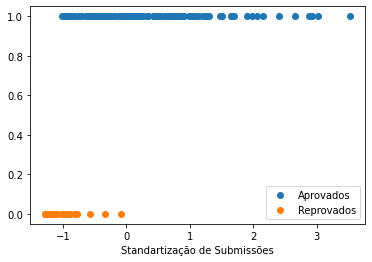

In [17]:
subm_apro = df[df['aprovado']==1]
subm_rep = df[df['aprovado']==0]
ind_a=[]
for i in range(len(subm_apro)):
    ind_a.append(1)
ind_b=[]
for i in range(len(subm_rep)):
    ind_b.append(0)
plt.scatter([subm_apro['total_subm'].tolist()], 
            ind_a, 
            marker='o', 
            label='Aprovados')
plt.scatter(subm_rep['total_subm'], 
            ind_b, 
            marker='o', 
            label='Reprovados')
plt.xlabel('Standartização de Submissões')
plt.legend(loc='lower right')
plt.show()

In [18]:
min_sub_int = subm_apro['total_subm'].min()
max_sub_int = subm_rep['total_subm'].max()

min_sub_int1 = subm_apro[subm_apro['total_subm']<=max_sub_int]
max_sub_int1 = subm_rep[subm_rep['total_subm']<=min_sub_int]

inter_subm = pd.merge(min_sub_int1, max_sub_int1, how = 'outer')
#adicionar novos dados a respeito desses id's, para verificar maior diferença entre os dados dos aprovados e obter uma melhor precisão na predição


In [19]:
#contando o erro por questao acima do tempo zero para prevenir duplo clicke. geralmente, se há cola ou algum problema relacionado, acaba nao sendo um erro na questao
#buscando erros por lista, por aluno

df_submission_class['timeInSecounds'] = df_submission_class['timeConsuming'].divide(1000).astype(int)

df_without_duplicates = df_submission_class[df_submission_class["timeInSecounds"] > 0].drop(['language','class_id','test_id','environment','timeConsuming','createdAt','timeInSecounds','char_change_number', 'ip', 'type', 'answer', 'lesson_id', 'id'], axis=1)
df_erro = df_without_duplicates[df_without_duplicates["hitPercentage"] == 0]
df_erro = df_erro.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalError')
df_erro = df_erro.groupby(['user_id'])['totalError'].sum()

#buscando quantidade de questoes certas por lista por aluno
df_acerto = df_without_duplicates[df_without_duplicates["hitPercentage"] > 0]
df_acerto = df_acerto.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalAcert')
df_acerto = df_acerto.groupby(['user_id'])['totalAcert'].sum()

#buscando quantidade de questoes que com 100% de acerto por lista por aluno
df_100 = df_without_duplicates[df_without_duplicates["hitPercentage"] == 100].drop_duplicates()
df_100 = df_100.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='acert_100')
df_100 = df_100.groupby(['user_id'])['acert_100'].sum()

#buscar se o aluno chegou a tirar 100 na questão ou a nota final.
#há mais de um acerto, pois há mais vezes que tentam tirar mais que zero, mas nem sempre chegam no 100
#avaliar a possibilidade de colocar a nota maxima do aluno em coluna

df = pd.merge(df_erro, df_acerto, on=['user_id'], how='outer')
df = pd.merge(df, df_100, on=['user_id'], how='outer')
df.replace(np.NaN, 0, inplace = True)
df = pd.merge(df, newDf, on=['user_id']).drop('medialist', axis=1)
df['totalError'] = (df['totalError'] - df['totalError'].mean()) / df['totalError'].std()
df['totalAcert'] = (df['totalAcert'] - df['totalAcert'].mean()) / df['totalAcert'].std()
df['acert_100'] = (df['acert_100'] - df['acert_100'].mean()) / df['acert_100'].std()
df

,user_id,totalError,totalAcert,acert_100,aprovado
0,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,-0.259531,-0.018019,0.497894,1
1,02673ba8-1fcb-4cb0-9cf3-a789cab48731,-1.034513,-1.444811,-1.928850,0
2,04dfe2af-6f44-4490-b9b7-d3714499e707,0.161655,-0.040667,0.235543,1
3,08a67c0a-d34f-46a9-be4a-f6940b7d278d,2.242313,1.672994,1.219358,1
4,0a66a6c5-3c7f-4b93-91c1-a301c18ebe1b,-0.018051,0.321693,0.126230,1
...,...,...,...,...,...
163,fcaef8a5-2a8c-4aef-b5a2-63f4b0b16d0c,0.549146,0.321693,-0.398471,1
164,fcb7eb8e-b20c-48ab-9d62-7151c035f78d,0.243084,0.155612,0.148093,1
165,fdc75b00-9949-4044-84e9-e2c5a557fb6e,-0.807072,-0.501166,0.388581,1
166,fea46941-644f-4038-811a-608fc3bea081,-0.484163,-0.772936,-1.469736,0


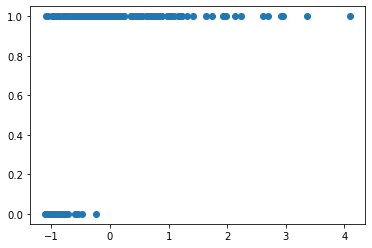

In [20]:
plt.scatter(df['totalError'].tolist(), 
            df['aprovado'].tolist(), 
            marker='o')
plt.show()

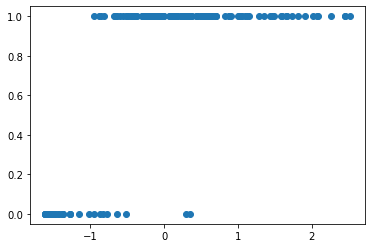

In [21]:
plt.scatter(df['totalAcert'].tolist(), 
            df['aprovado'].tolist(), 
            marker='o')
plt.show()

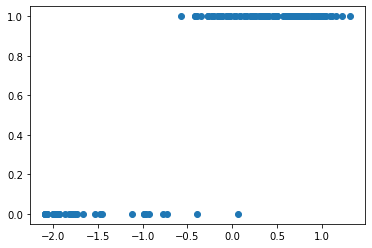

In [22]:
plt.scatter(df['acert_100'].tolist(), 
            df['aprovado'].tolist(), 
            marker='o')
plt.show()

In [23]:
subm_apro = df[df['aprovado']==1]
subm_rep = df[df['aprovado']==0]

min_sub_int = subm_apro['acert_100'].min()
max_sub_int = subm_rep['acert_100'].max()

min_sub_int

-0.573371490914618

In [24]:
#aprovados - acima da media
#submissoes da turma
df_performance = df_submission.groupby(['user_id', 'listQuestions_id','question_id'])['hitPercentage'].max().reset_index()
#soma das notas por lista
df_performance = df_performance.groupby(['user_id','listQuestions_id'])['hitPercentage'].sum().reset_index()
#Me traz as porcentagens maximas de acerto por questão
df_performance = df_submission.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].max().reset_index()
      #Soma as porcentagens de uma lista/prova unica
df_performance = df_performance.groupby(['user_id','listQuestions_id'])['hitPercentage'].sum().reset_index()
      #Renomeando para melhorar entendimento
df_performance.rename(columns={'hitPercentage':'totalHitPercentage'}, inplace = True)
#Listas cadastradas nessa turma
lists = df_submission['listQuestions_id'].drop_duplicates().values
#Lista de alunos
df_without_duplicates = df_submission.drop_duplicates(subset=['user_id'])
df_without_duplicates = df_without_duplicates[['user_id']]
df_prov = pd.DataFrame()
for lista in lists:
    df_users = df_without_duplicates.copy()
    df_users['listQuestions_id'] = lista
    df_prov = df_prov.append(df_users)
    #df_prov.loc[df_prov['user_id']=='Flávio']
df_performance = pd.merge(df_performance,df_prov, on=['user_id','listQuestions_id'], how='outer')#.fillna(0)  
#df_question_data = df_quest.groupby(['listQuestions_id','question_id'])['id_list'].count().reset_index()
      #Conta quantas questões tem por lista
df_question_data = list_quest_subm.groupby(['listQuestions_id'])['question_id'].count().reset_index(name='totalQuestionslist')
      #Merge
df_performance = df_performance.merge(df_question_data, on = 'listQuestions_id')
    #Média de acerto por lista
df_performance['medialist'] = df_performance['totalHitPercentage'] / df_performance['totalQuestionslist']
      #Convertendo para datetime
df_lop_lists['createdAt'] = pd.to_datetime(df_lop_lists['createdAt'])
      #Criando campo com a data
df_lop_lists['dateList'] = df_lop_lists['createdAt'].dt.date
      #Merge
lists_df = df_lop_lists
lists_df.columns.values[0] = 'listQuestions_id'

#df_performance = pd.merge(df_performance, lists_df.drop(columns = ['createdAt']), on='listQuestions_id')
    #graph1
    #Número de alunos na turma
#total_students = df_submission['user_id'].drop_duplicates().count()
    #Media por lista na turma
#df_mean_list = (df_performance.groupby(['listQuestions_id'])['medialist'].sum() / total_students).reset_index(name='mediaListClass')
#newDf = pd.merge(df_performance, df_mean_list,on=['listQuestions_id']).sort_values(by=['user_id']).drop(columns = ['mediaListClass','totalHitPercentage', 'listQuestions_id', 'totalQuestionslist']).fillna(0)
    #newDf.loc[newDf['user_id']=='Alexandre Leonardo']
#newDf = newDf.groupby(['user_id'])['medialist'].sum().reset_index()
#newDf['medialist'] = newDf['medialist'] / lists_df.count().values[0]
#newDf
    #newDf
    #newDf[newDf['medialist']>=50].values[0]
    #newDf['medialist'].values[0]
    #for a in range(newDf.count().values[0]):
    #    if newDf['medialist'].values[a]>=50:
    #        b=b+1
    #b
#newDf['aprovado'] = 2
#for a in range(newDf.count().values[0]):
#    if newDf['medialist'].values[a]>=50:
#        newDf['aprovado'][a]=1
#    else:
#        newDf['aprovado'][a]=0
#newDf[newDf['aprovado']==1]

In [25]:
df_submission['timeInSecounds'] = df_submission['timeConsuming'].divide(1000).astype(int)

df_without_duplicates = df_submission[df_submission["timeInSecounds"] > 0].drop(['language','class_id','test_id','environment','timeConsuming','createdAt','timeInSecounds','char_change_number', 'ip', 'type', 'answer', 'lesson_id', 'id'], axis=1)
df_erro = df_without_duplicates[df_without_duplicates["hitPercentage"] == 0]
df_erro = df_erro.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalError')
df_erro = df_erro.groupby(['user_id'])['totalError'].sum()

#buscando quantidade de questoes certas por lista por aluno
df_acerto = df_without_duplicates[df_without_duplicates["hitPercentage"] > 0]
df_acerto = df_acerto.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalAcert')
df_acerto = df_acerto.groupby(['user_id'])['totalAcert'].sum()

#buscando quantidade de questoes que com 100% de acerto por lista por aluno
df_100 = df_without_duplicates[df_without_duplicates["hitPercentage"] == 100].drop_duplicates()
df_100 = df_100.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='acert_100')
df_100 = df_100.groupby(['user_id'])['acert_100'].sum()

#buscar se o aluno chegou a tirar 100 na questão ou a nota final.
#há mais de um acerto, pois há mais vezes que tentam tirar mais que zero, mas nem sempre chegam no 100
#avaliar a possibilidade de colocar a nota maxima do aluno em coluna

df = pd.merge(df_erro, df_acerto, on=['user_id'], how='outer')
df = pd.merge(df, df_100, on=['user_id'], how='outer')
df.replace(np.NaN, 0, inplace = True)
df = pd.merge(df, newDf, on=['user_id']).drop('medialist', axis=1)
df['totalError'] = (df['totalError'] - df['totalError'].mean()) / df['totalError'].std()
df['totalAcert'] = (df['totalAcert'] - df['totalAcert'].mean()) / df['totalAcert'].std()
df['acert_100'] = (df['acert_100'] - df['acert_100'].mean()) / df['acert_100'].std()
df

,user_id,totalError,totalAcert,acert_100,aprovado
0,01bc9dc9-6a49-4e94-8dbd-cd0dcec05cdb,-0.149979,-0.404436,0.176735,1
1,02673ba8-1fcb-4cb0-9cf3-a789cab48731,-0.362644,1.158897,0.295496,0
2,04dfe2af-6f44-4490-b9b7-d3714499e707,1.571659,2.068963,1.067439,1
3,08a67c0a-d34f-46a9-be4a-f6940b7d278d,0.767054,0.420031,0.038181,1
4,0a66a6c5-3c7f-4b93-91c1-a301c18ebe1b,-0.152688,0.676832,-0.001405,1
...,...,...,...,...,...
164,fbab1095-0b33-4d03-9184-5d48b3ce18e6,0.054559,0.046092,-0.238926,1
165,fcaef8a5-2a8c-4aef-b5a2-63f4b0b16d0c,-0.076833,-0.426962,-0.911902,1
166,fcb7eb8e-b20c-48ab-9d62-7151c035f78d,-0.224479,-0.526078,-0.397274,1
167,fdc75b00-9949-4044-84e9-e2c5a557fb6e,-0.731082,-0.918037,-0.238926,1
